In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
!pip install torch

# Load file

In [ ]:
df = pd.read_csv('stroke_prediction.csv')
df.tail(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5197,38132,Female,13.00,0,0,No,Private,Rural,172.27,16.6,never smoked,0
5198,50136,Female,54.00,1,0,Yes,Private,Urban,221.83,35.1,smokes,0
5199,3094,Male,28.00,0,0,No,Private,Urban,74.61,32.7,Unknown,0
5200,42727,Female,61.00,0,0,Yes,Private,Rural,60.91,29.8,Unknown,0
5201,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
5202,33185,Male,59.00,0,0,No,Govt_job,Urban,83.60,27.5,formerly smoked,0
5203,7057,Male,12.00,0,0,No,children,Urban,83.95,23.6,Unknown,0
5204,48244,Female,38.00,0,0,No,Private,Rural,77.50,36.9,smokes,0
5205,69559,Male,15.00,0,0,No,Never_worked,Urban,64.29,16.7,Unknown,0
5206,61757,Male,31.00,0,0,Yes,Self-employed,Rural,61.10,26.5,never smoked,0


In [ ]:
print('Shape of Stroke Prediction DataFrame: ', df.shape)
df.info()

Shape of Stroke Prediction DataFrame:  (5212, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5212 entries, 0 to 5211
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5212 non-null   int64  
 1   gender             5212 non-null   object 
 2   age                5212 non-null   float64
 3   hypertension       5212 non-null   int64  
 4   heart_disease      5212 non-null   int64  
 5   ever_married       5212 non-null   object 
 6   work_type          5212 non-null   object 
 7   Residence_type     5212 non-null   object 
 8   avg_glucose_level  5212 non-null   float64
 9   bmi                5007 non-null   float64
 10  smoking_status     5212 non-null   object 
 11  stroke             5212 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 488.8+ KB


In [ ]:
#handling missing and duplicate values
df['bmi'] = df['bmi'].fillna(df["bmi"].median())
df.drop_duplicates(inplace= True)

In [ ]:
print(df.isnull().sum())
print(df.duplicated().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
0


In [ ]:
#Split categorical and numerical feature
column_names = df.columns
cats = []
nums = []
for i in column_names:
     if df[i].dtypes == 'object':
          cats.append(i)
     else:
          nums.append(i)
print(cats)
print(nums)

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [ ]:
from sklearn.preprocessing import LabelEncoder
#Encoder the categorical features
le = LabelEncoder()
for i in cats:
     if df[i].dtypes == 'object':
          df[i] = le.fit_transform(df[i])
print(df.dtypes)

id                     int64
gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object


In [ ]:
#Split feature and target
X = df.drop('stroke', axis= 1)
y = df['stroke']

In [ ]:
X = df.iloc[:, 0:-1].values
y = list(df.iloc[:, -1])

In [ ]:
#Data scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#Split train and test set
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = .20)

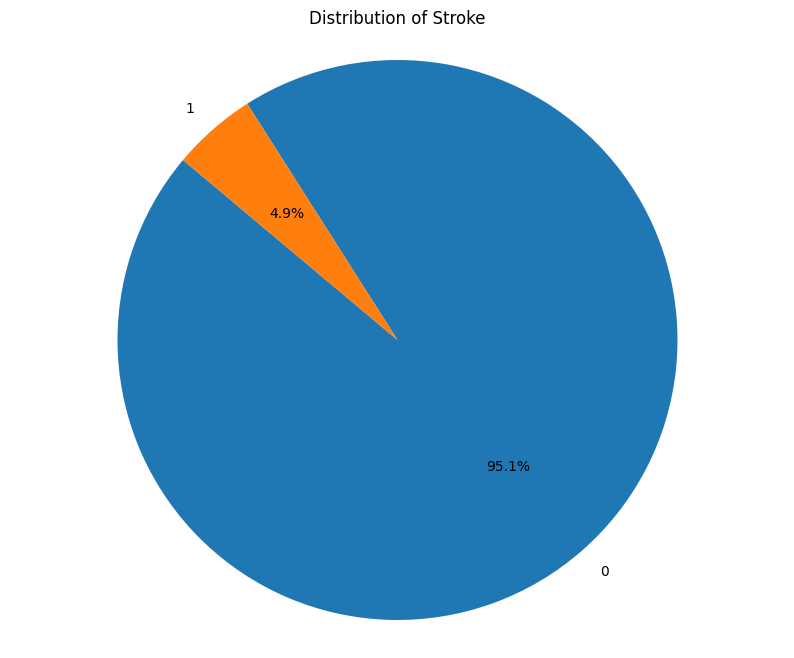

In [ ]:
target_counts = df['stroke'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Stroke')
plt.axis('equal')
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)

X_train, y_train = smote.fit_resample(X_train, y_train)

# Pytorch


In [ ]:
# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).unsqueeze(1)

In [ ]:
class Dataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    # get item for each index
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # get len of dataset
    def __len__(self):
        return len(self.x)

In [ ]:
train_ds = Dataset(X_train_tensor, y_train_tensor)
test_ds = Dataset(X_test_tensor, y_test_tensor)

In [ ]:
# Load data to dataloader for batch processing
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=32, shuffle=True)

# Build NN

In [ ]:
class Model(nn.Module):
    def __init__(self, input_features, output_features):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_features, 10)
        self.fc2 = nn.Linear(10, 20)
        self.fc3 = nn.Linear(20, 8)
        self.fc4 = nn.Linear(8, output_features)
        self.tanh = nn.Tanh()
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.fc4(out)
        return out

In [ ]:
# Create neural network object
net = Model(input_features = 11, output_features = 1)

# print network architecture
print(net)

Model(
  (fc1): Linear(in_features=11, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=1, bias=True)
  (tanh): Tanh()
  (relu): ReLU()
)


In [ ]:
def checkpoint(model, filename):
    torch.save(model.state_dict(), filename)

In [ ]:
# Define binary class entropy (in and output should have same shape)
#criterion = torch.nn.BCELoss(size_average=True)
criterion = nn.MSELoss()

# Define optimizers
optimizers = {
    "SGD": torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-5),
    "Adam": torch.optim.Adam(net.parameters(), lr=0.1, weight_decay=1e-5),
    "RMSprop": torch.optim.RMSprop(net.parameters(), lr=0.1, weight_decay=1e-5),
    "AdamW": torch.optim.AdamW(net.parameters(), lr=0.1, weight_decay=1e-5),
}

# optimizers = {
#     "SGD": torch.optim.SGD(net.parameters(), lr=1e-5),
#     "Adam": torch.optim.Adam(net.parameters(),  weight_decay=1e-5),
#     "RMSprop": torch.optim.RMSprop(net.parameters(),  weight_decay=1e-5),
#     "AdamW": torch.optim.AdamW(net.parameters(),  weight_decay=1e-5),
# }

epochs = 50
early_stop_thresh = 5
best_loss = float('inf')
best_epoch = -1
# accuracies = {optimizer_name: [] for optimizer_name in optimizers}
losses = {optimizer_name: [] for optimizer_name in optimizers}

In [ ]:
# Iterate over different optimization algorithms
for optimizer_name, optimizer in optimizers.items():
    # Iterate over the specified number of epochs
    for epoch in range(epochs):
        # Set the network to training mode
        net.train()
        for inputs, labels in train_loader:
            inputs = inputs.float()
            labels = labels.float()
            outputs = net(inputs) # Forward prop
            loss = criterion(outputs, labels) # Loss calculation
            optimizer.zero_grad() # Clear the gradient buffer
            loss.backward() # Backprop
            optimizer.step() # Update weights

        # Set the network to evaluation mode
        net.eval()
        correct = 0
        total = 0
        # Disable gradient calculation
        with torch.no_grad():
            # Evaluate the trained model on the test dataset
            for inputs, labels in test_loader:
                inputs = inputs.float()
                labels = labels.float()
                outputs = net(inputs)

                # Convert outputs to binary predictions
                predicted = (outputs > 0.5).float()

                # Calculate total and correct predictions
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

         # Calculate accuracy
        accuracy = 100 * correct / total
        # Store accuracy for the current optimizer
        accuracies[optimizer_name].append(accuracy)

        # Print statistics
        print('Optimizer: {}, Epoch {}/{}, Accuracy: {:.2f}'.format(
            optimizer_name, epoch + 1, epochs, accuracy))

        # Check for best accuracy and early stopping
        if accuracy > best_accuracy:
            # Update best accuracy and epoch
            best_accuracy = accuracy
            best_epoch = epoch

            # Save the model checkpoint
            checkpoint(net, f"best_epoch_{optimizer_name}.pth")

        # Stop training process if the accuracy doesn't improve
        if epoch - best_epoch > early_stop_thresh:
            print(f'{optimizer_name} algorithms stopped training at epoch %d' % epoch)
            print('\n\n')
            break


Optimizer: SGD, Epoch 1/50, Accuracy: 78.08
Optimizer: SGD, Epoch 2/50, Accuracy: 83.37
Optimizer: SGD, Epoch 3/50, Accuracy: 77.59
Optimizer: SGD, Epoch 4/50, Accuracy: 67.42
Optimizer: SGD, Epoch 5/50, Accuracy: 73.48
Optimizer: SGD, Epoch 6/50, Accuracy: 82.29
SGD algorithms stopped training at epoch 5



Optimizer: Adam, Epoch 1/50, Accuracy: 65.26
Optimizer: Adam, Epoch 2/50, Accuracy: 75.93
Optimizer: Adam, Epoch 3/50, Accuracy: 66.63
Optimizer: Adam, Epoch 4/50, Accuracy: 72.21
Optimizer: Adam, Epoch 5/50, Accuracy: 57.63
Optimizer: Adam, Epoch 6/50, Accuracy: 61.94
Adam algorithms stopped training at epoch 5



Optimizer: RMSprop, Epoch 1/50, Accuracy: 42.17
Optimizer: RMSprop, Epoch 2/50, Accuracy: 67.71
Optimizer: RMSprop, Epoch 3/50, Accuracy: 69.37
Optimizer: RMSprop, Epoch 4/50, Accuracy: 77.50
Optimizer: RMSprop, Epoch 5/50, Accuracy: 68.20
Optimizer: RMSprop, Epoch 6/50, Accuracy: 83.86
RMSprop algorithms stopped training at epoch 5



Optimizer: AdamW, Epoch 1/50, Accur

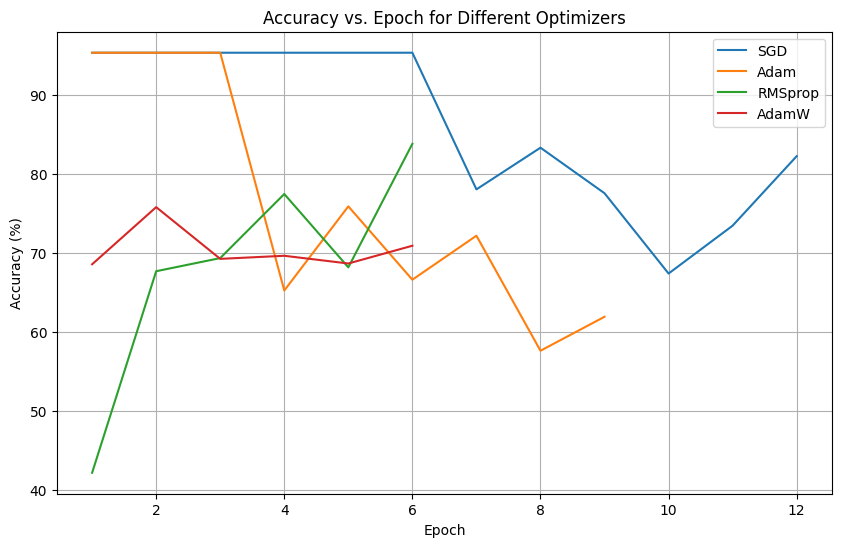

In [ ]:
# Accuracy Plot
plt.figure(figsize=(10, 6))
for optimizer_name, accuracy_list in accuracies.items():
    plt.plot(range(1, len(accuracy_list) + 1), accuracy_list, label=optimizer_name)

plt.title('Accuracy vs. Epoch for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.show()